In [1]:
!pip install -q umap-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
import umap.umap_ as umap
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['target']))

X = pd.DataFrame(scaled_features, columns=data.feature_names)
y = df['target']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


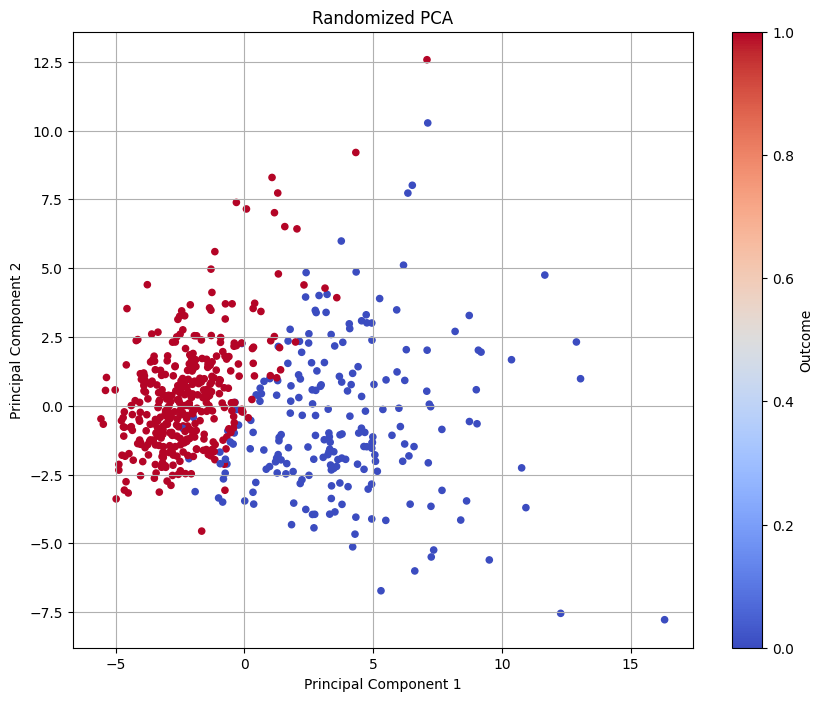

In [7]:
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_rpca = randomized_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_rpca[:, 0], X_rpca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Randomized PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

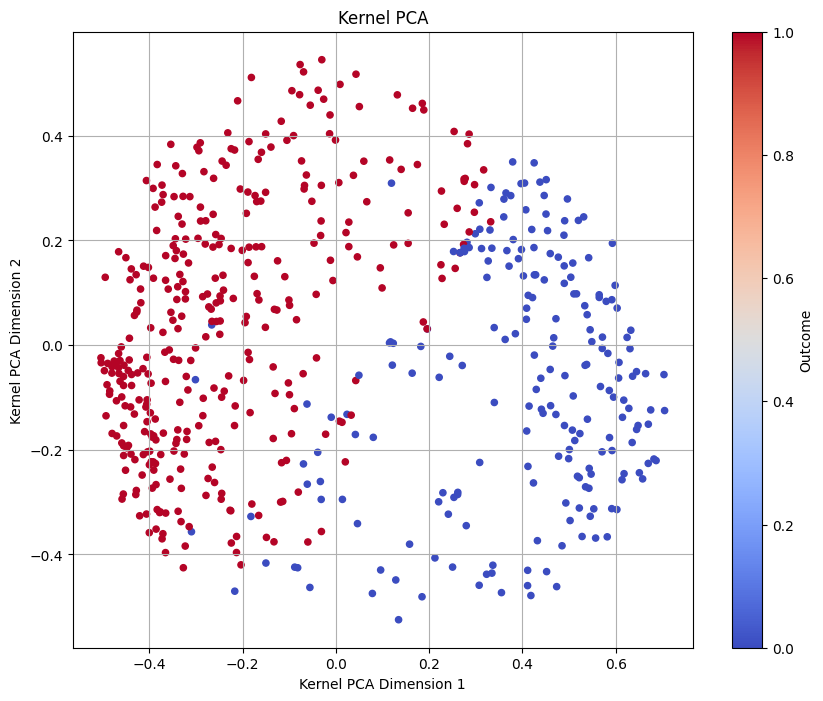

In [8]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, random_state=42)
X_kpca = kernel_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Kernel PCA")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.grid(True)
plt.show()

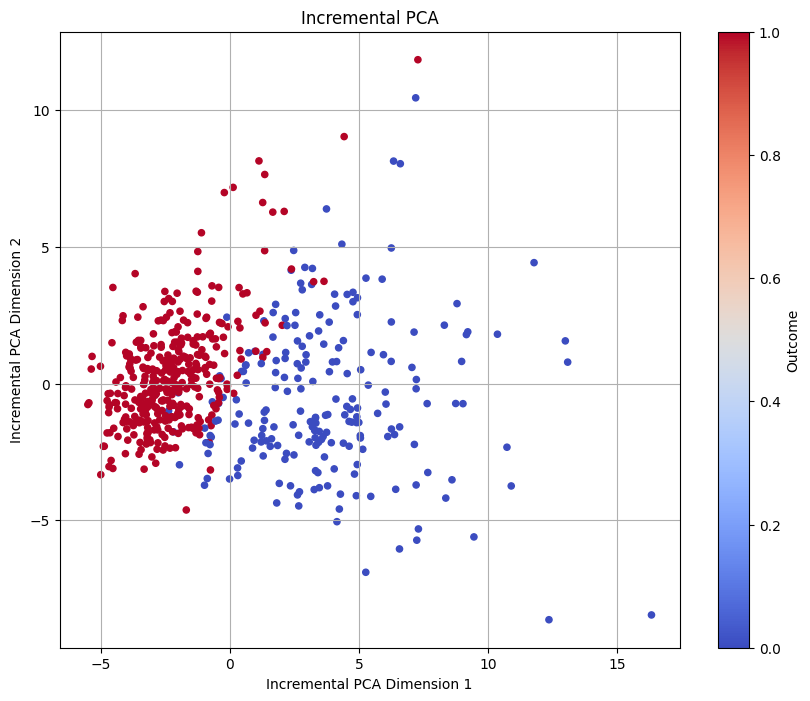

In [9]:
incremental_pca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = incremental_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Incremental PCA")
plt.xlabel("Incremental PCA Dimension 1")
plt.ylabel("Incremental PCA Dimension 2")
plt.grid(True)
plt.show()

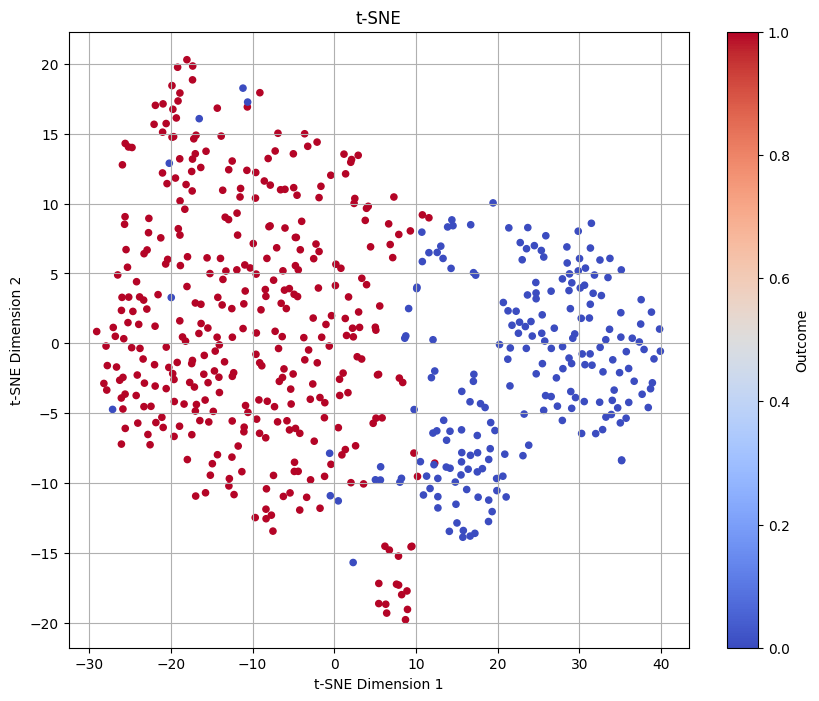

In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

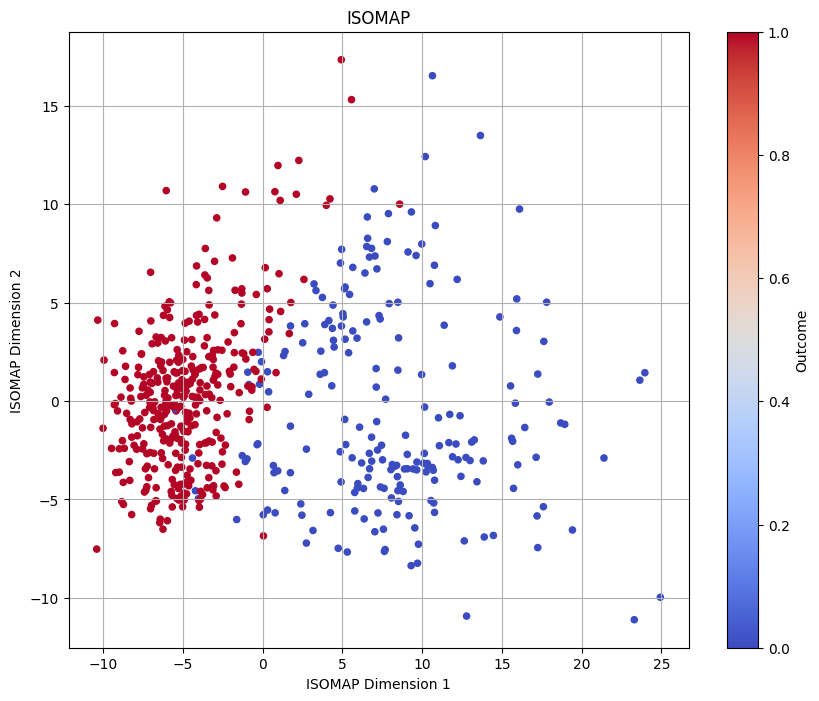

In [11]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("ISOMAP")
plt.xlabel("ISOMAP Dimension 1")
plt.ylabel("ISOMAP Dimension 2")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


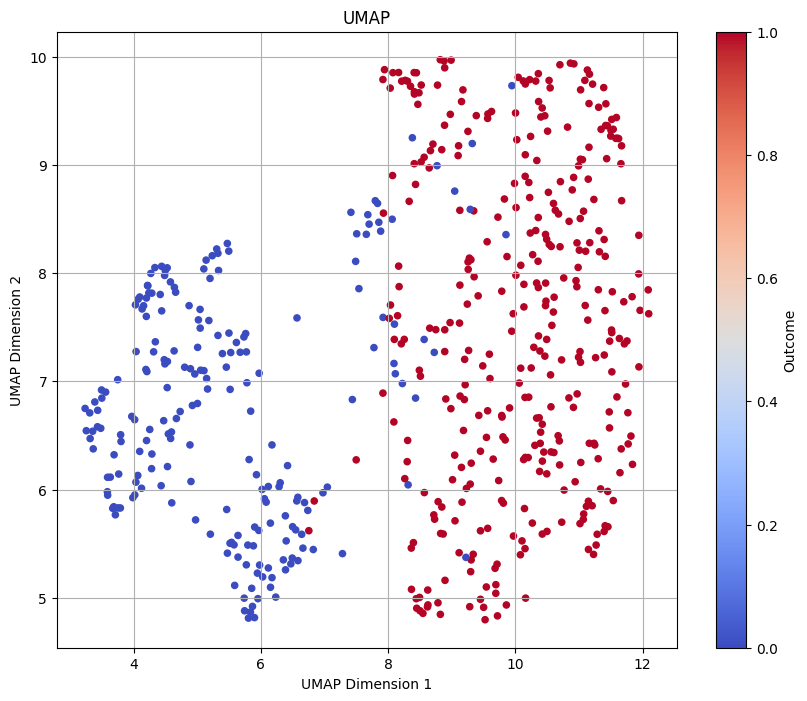

In [12]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("UMAP")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

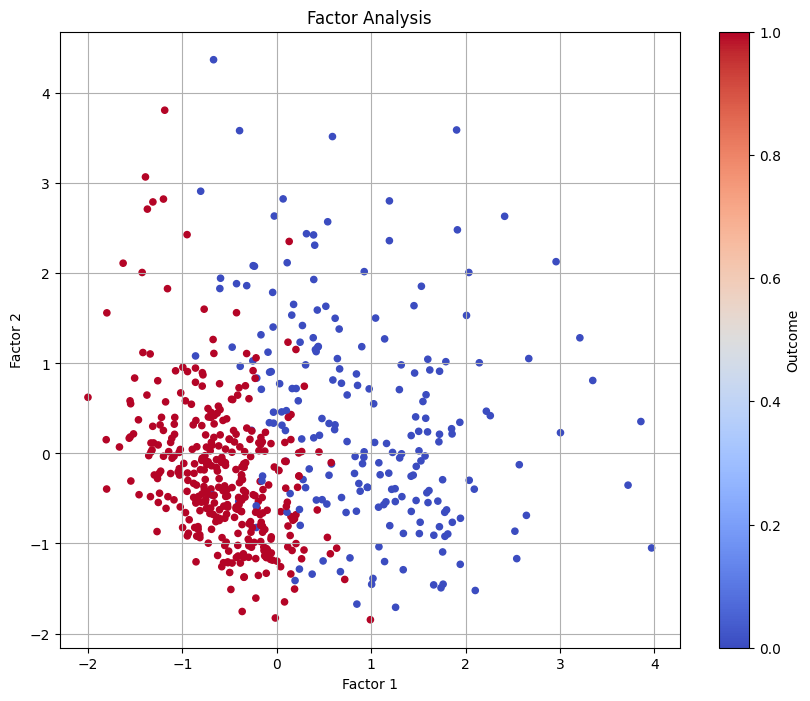

In [13]:
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Factor Analysis")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.grid(True)
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


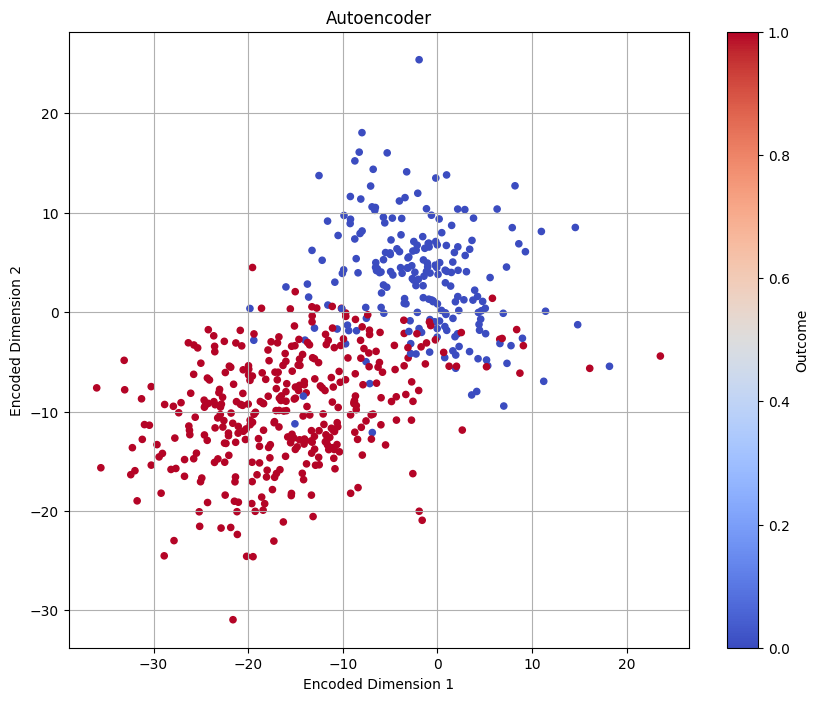

In [14]:
input_dimensions = X.shape[1]

input_layer = layers.Input(shape=(input_dimensions,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded_output = layers.Dense(2, activation='linear')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded_output)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded_output = layers.Dense(input_dimensions, activation='sigmoid')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded_output)
encoder = models.Model(inputs=input_layer, outputs=encoded_output)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, verbose=0)

X_autoencoder = encoder.predict(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_autoencoder[:, 0], X_autoencoder[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Autoencoder")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.grid(True)
plt.show()

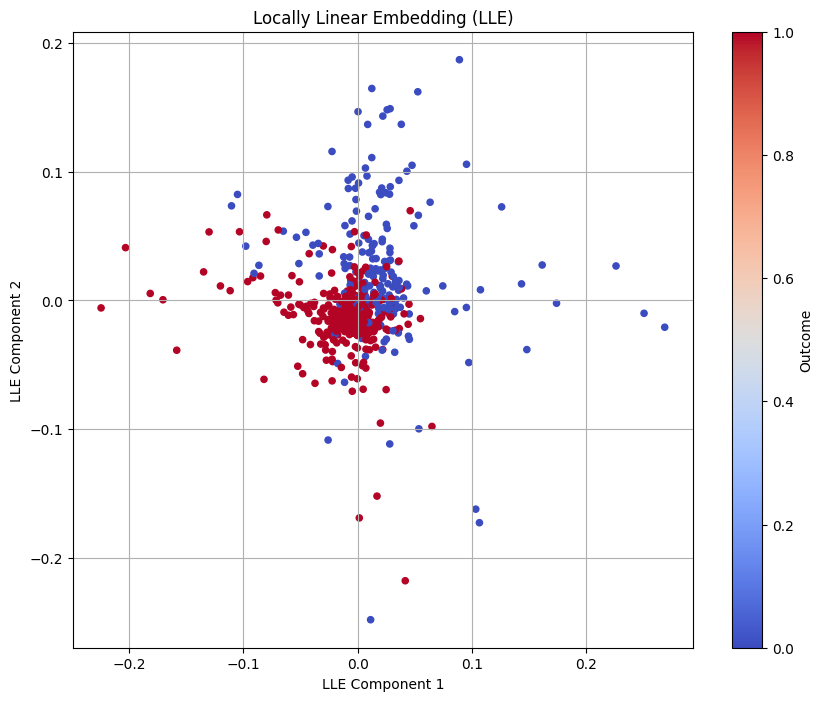

In [15]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard')
X_lle = lle.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Locally Linear Embedding (LLE)")
plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.grid(True)
plt.show()

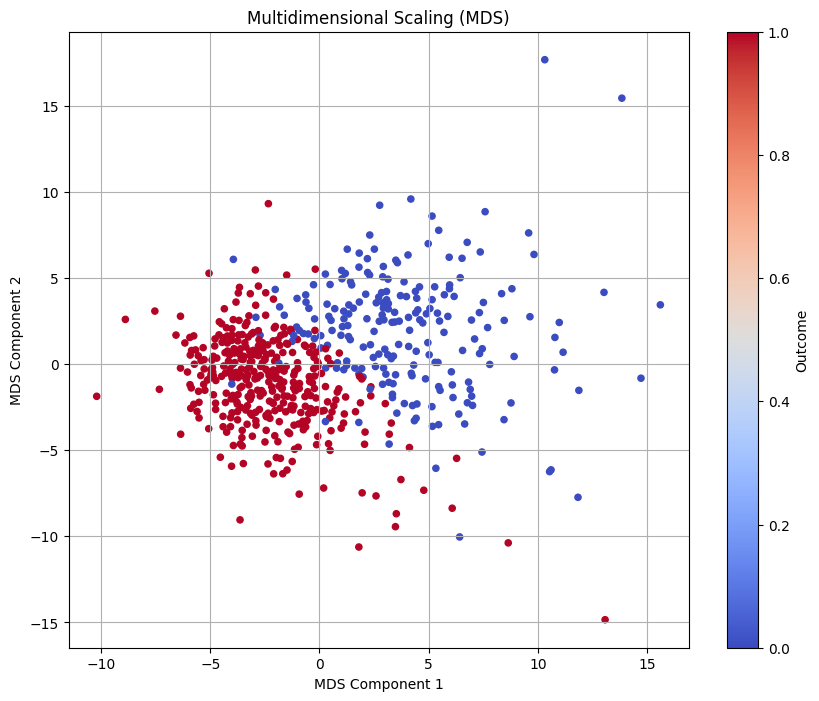

In [16]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Multidimensional Scaling (MDS)")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.grid(True)
plt.show()

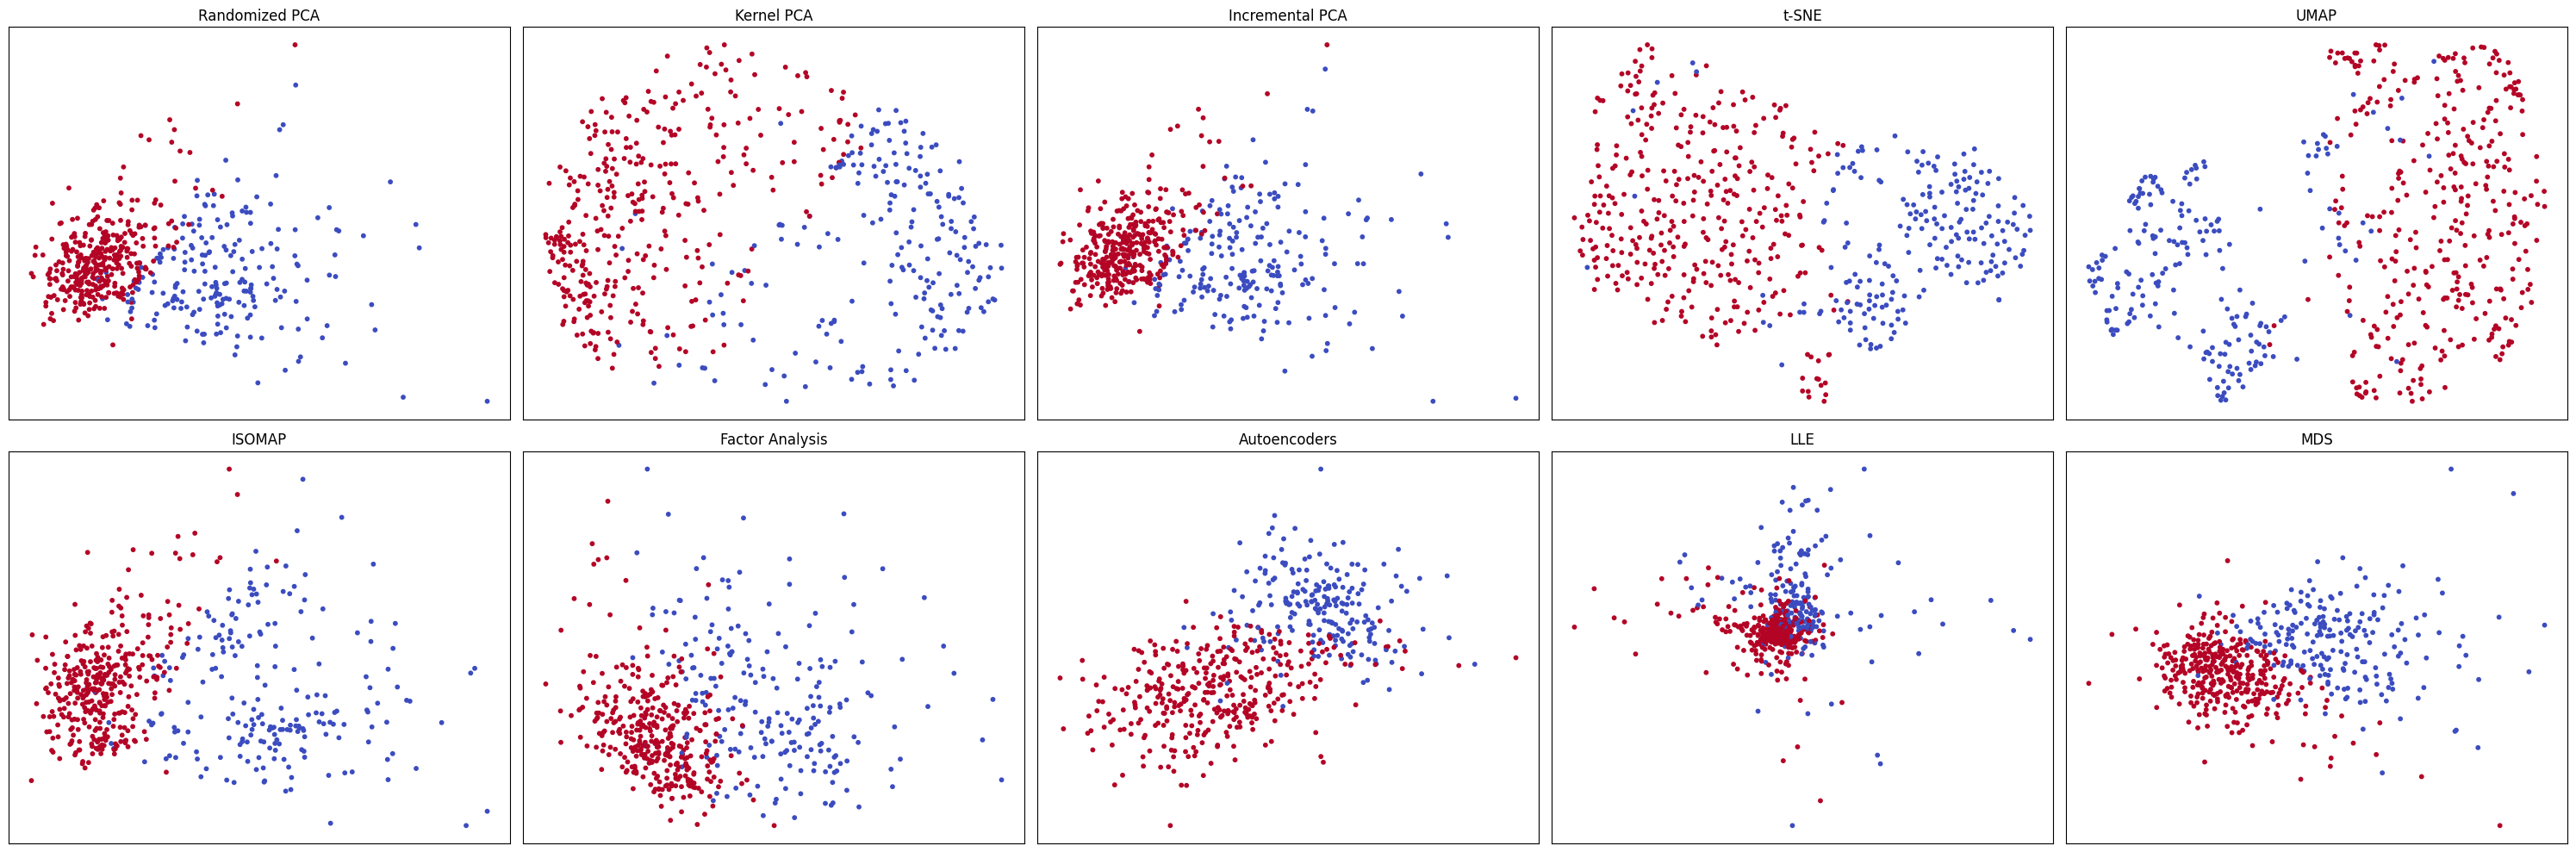

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(30, 10))
techniques = [
    ("Randomized PCA", X_rpca),
    ("Kernel PCA", X_kpca),
    ("Incremental PCA", X_ipca),
    ("t-SNE", X_tsne),
    ("UMAP", X_umap),
    ("ISOMAP", X_isomap),
    ("Factor Analysis", X_fa),
    ("Autoencoders", X_autoencoder),
    ("LLE", X_lle),
    ("MDS", X_mds)
]

for ax, (title, data) in zip(axes.flat, techniques):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='coolwarm', s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Summary

Techniques like UMAP and t-SNE exhibit clear separation between classes due to their ability to preserve local neighborhood structures, making them highly effective for non-linear relationships.

Kernel PCA and ISOMAP provide moderate separation by leveraging non-linear kernels and manifold learning, respectively, but are less effective for complex, non-linear separations.

Randomized PCA, Incremental PCA, and Factor Analysis rely on linear transformations, which struggle with non-linear separations, leading to overlapping clusters.

Autoencoders demonstrate decent separation by learning compressed latent representations, though their performance depends on model tuning.

LLE and MDS show clustering but are denser and less separated compared to UMAP and t-SNE, as they prioritize local relationships and distance preservation.

These observations highlight that non-linear techniques, especially UMAP and t-SNE, are best suited for uncovering intrinsic patterns in tabular data with complex relationships.